In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_128/lag_neg10/enc_test_128_lag_neg2.npy')    ###change
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_128/lag_neg10/resp_test_128_lag_neg2.npy')   ###change

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((49342, 128), (49342, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=32, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 32

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((49342, 128), (49342, 214))

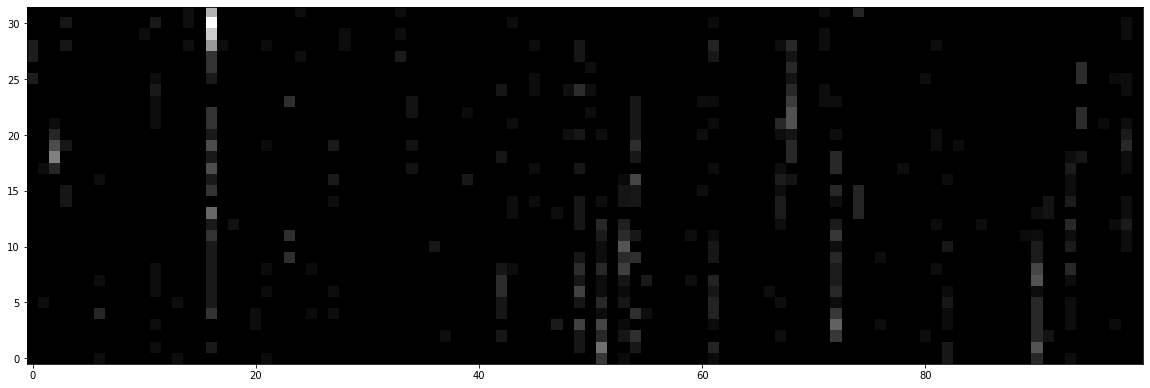

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 20, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
ind = [165, 16, 191, 114, 12, 50, 96, 38, 211, 82, 130, 76, 142, 102, 107, 159, 156,
       66, 67, 206, 110, 93, 122, 125, 187, 68, 80, 81, 205, 147, 186, 63, 170, 51,
       2, 128, 41, 207, 35, 11, 21, 183, 112, 145, 53, 209, 57, 75, 31, 33]
units_to_process_all = np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy')
units_to_process = list(units_to_process_all[ind])

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_128/lag_neg10'                                   ###change

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 32
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.144455
    2       0    0.139225
    3       0    0.135064
    4       0    0.131112
    5       0    0.129907
    6       0    0.127106
    7       0    0.125394
    8       0    0.124819
    9       0    0.123761
   10       0    0.122234
   11       0    0.121400
   12       0    0.120791
   13       0    0.120302
   14       0    0.119745
   15       0    0.119029
   16       0    0.118394
   17       0    0.117350
   18       0    0.117160
   19       0    0.116944
   20       0    0.116279
   21       0    0.116156
   22       0    0.115683
   23       0    0.115367
   24       0    0.115251
   25       0    0.114990
   26       0    0.115026
   27       1    0.114903
   28       0    0.114556
   29       0    0.114601
   30       1    0.114178
   31       0    0.113719
   32       0    0.113610
   33       0    0.113370
   34       0    0.112970
   35       0    0.112743
   36       0    0.112714
   37       0    0.112618
   38       

   15       0    0.111811
   16       0    0.111154
   17       0    0.111034
   18       0    0.110333
   19       0    0.110184
   20       0    0.109860
   21       0    0.109511
   22       0    0.109226
   23       0    0.109082
   24       0    0.108948
   25       0    0.108590
   26       0    0.108335
   27       0    0.108306
   28       0    0.108195
   29       0    0.108108
   30       0    0.108089
   31       0    0.108025
   32       0    0.107874
   33       0    0.107950
   34       1    0.108003
   35       2    0.107504
   36       0    0.107316
   37       0    0.107205
   38       0    0.107020
   39       0    0.106923
   40       0    0.106929
   41       1    0.106898
   42       0    0.106962
   43       1    0.106900
   44       2    0.106693
   45       0    0.106596
   46       0    0.106469
   47       0    0.106383
   48       0    0.106354
   49       0    0.106303
   50       0    0.106316
   51       1    0.106265
   52       0    0.106146
   53       

   10       0    0.101299
   11       0    0.100892
   12       0    0.100407
   13       0    0.099930
   14       0    0.099597
   15       0    0.099155
   16       0    0.098962
   17       0    0.098362
   18       0    0.098075
   19       0    0.097831
   20       0    0.097613
   21       0    0.097648
   22       1    0.097558
   23       0    0.097062
   24       0    0.096851
   25       0    0.096632
   26       0    0.096122
   27       0    0.095915
   28       0    0.095673
   29       0    0.095536
   30       0    0.095431
   31       0    0.095128
   32       0    0.094988
   33       0    0.094764
   34       0    0.094613
   35       0    0.094136
   36       0    0.093938
   37       0    0.093798
   38       0    0.093814
   39       1    0.093750
   40       0    0.093669
   41       0    0.093506
   42       0    0.093393
   43       0    0.093249
   44       0    0.093188
   45       0    0.093149
   46       0    0.092993
   47       0    0.092942
   48       

   49       0    0.088444
   50       0    0.088384
   51       0    0.088159
   52       0    0.088058
   53       0    0.087956
   54       0    0.087939
   55       0    0.087884
   56       0    0.087846
   57       0    0.087832
   58       0    0.087805
   59       0    0.087781
   60       0    0.087773
   61       0    0.087790
   62       1    0.087787
   63       2    0.087754
   64       0    0.087779
   65       1    0.087786
   66       2    0.087726
   67       0    0.087706
   68       0    0.087665
   69       0    0.087623
   70       0    0.087597
   71       0    0.087594
   72       0    0.087591
   73       0    0.087562
   74       0    0.087569
   75       1    0.087590
   76       2    0.087585
   77       3    0.087569
   78       4    0.087556
   79       0    0.087530
   80       0    0.087535
   81       1    0.087536
   82       2    0.087498
   83       0    0.087504
   84       1    0.087482
   85       0    0.087512
   86       1    0.087555
   87       

   65       2    0.090613
   66       3    0.090539
   67       4    0.090511
   68       5    0.090501
   69       6    0.090482
   70       7    0.090449
   71       0    0.090437
   72       0    0.090422
   73       0    0.090413
   74       0    0.090402
   75       0    0.090363
   76       0    0.090370
   77       1    0.090355
   78       0    0.090335
   79       0    0.090308
   80       0    0.090311
   81       1    0.090291
   82       0    0.090257
   83       0    0.090269
   84       1    0.090258
   85       2    0.090203
   86       0    0.090186
   87       0    0.090191
   88       1    0.090168
   89       0    0.090152
   90       0    0.090137
   91       0    0.090132
   92       0    0.090138
   93       1    0.090129
   94       0    0.090111
   95       0    0.090119
   96       1    0.090130
   97       2    0.090112
   98       3    0.090106
   99       0    0.090118
  100       1    0.090137
  101       2    0.090131
  102       3    0.090117
  103       

    7       0    0.097966
    8       0    0.097722
    9       0    0.097424
   10       0    0.097021
   11       0    0.096822
   12       0    0.096560
   13       0    0.096365
   14       0    0.095926
   15       0    0.095559
   16       0    0.095470
   17       0    0.095357
   18       0    0.095192
   19       0    0.095069
   20       0    0.094777
   21       0    0.094237
   22       0    0.094167
   23       0    0.094166
   24       0    0.093856
   25       0    0.093580
   26       0    0.093521
   27       0    0.093400
   28       0    0.093324
   29       0    0.093223
   30       0    0.093159
   31       0    0.093094
   32       0    0.093011
   33       0    0.092983
   34       0    0.092895
   35       0    0.092841
   36       0    0.092789
   37       0    0.092720
   38       0    0.092640
   39       0    0.092592
   40       0    0.092529
   41       0    0.092477
   42       0    0.092429
   43       0    0.092431
   44       1    0.092321
   45       

   76       0    0.091107
   77       1    0.091101
   78       2    0.091079
   79       0    0.091086
   80       1    0.091093
   81       2    0.091105
   82       3    0.091087
   83       4    0.091079
   84       0    0.091059
   85       0    0.091058
   86       0    0.091082
   87       1    0.091073
   88       2    0.091036
   89       0    0.091037
   90       1    0.091040
   91       2    0.091029
   92       0    0.091031
   93       1    0.091031
   94       2    0.091024
   95       0    0.091026
   96       1    0.091019
   97       0    0.091007
   98       0    0.091019
   99       1    0.091042
  100       2    0.091032
  101       3    0.090999
  102       0    0.090997
  103       0    0.091019
  104       1    0.091019
  105       2    0.091025
  106       3    0.091025
  107       4    0.091011
  108       5    0.091006
  109       6    0.091026
  110       7    0.091026
  111       8    0.091013
  112       9    0.091034
minimum of test set found
Iters   tall

    8       0    0.156353
    9       0    0.155524
   10       0    0.154872
   11       0    0.154562
   12       0    0.154117
   13       0    0.153589
   14       0    0.153134
   15       0    0.152805
   16       0    0.152527
   17       0    0.152018
   18       0    0.151715
   19       0    0.151645
   20       0    0.151290
   21       0    0.151067
   22       0    0.151076
   23       1    0.150976
   24       0    0.150678
   25       0    0.150575
   26       0    0.150258
   27       0    0.150081
   28       0    0.149949
   29       0    0.149932
   30       0    0.149848
   31       0    0.149823
   32       0    0.149783
   33       0    0.149688
   34       0    0.149683
   35       0    0.149606
   36       0    0.149539
   37       0    0.149456
   38       0    0.149413
   39       0    0.149278
   40       0    0.149228
   41       0    0.148972
   42       0    0.148756
   43       0    0.148659
   44       0    0.148435
   45       0    0.148391
   46       

    1       0    0.083354
    2       0    0.080889
    3       0    0.079551
    4       0    0.077747
    5       0    0.075494
    6       0    0.074255
    7       0    0.073477
    8       0    0.073118
    9       0    0.072351
   10       0    0.072103
   11       0    0.071848
   12       0    0.071349
   13       0    0.070504
   14       0    0.070266
   15       0    0.070169
   16       0    0.069673
   17       0    0.069272
   18       0    0.069207
   19       0    0.069014
   20       0    0.068945
   21       0    0.068912
   22       0    0.068757
   23       0    0.068448
   24       0    0.068263
   25       0    0.068077
   26       0    0.067972
   27       0    0.067655
   28       0    0.067444
   29       0    0.067461
   30       1    0.067398
   31       0    0.067160
   32       0    0.066654
   33       0    0.066484
   34       0    0.066358
   35       0    0.066443
   36       1    0.066394
   37       2    0.066251
   38       0    0.066185
   39       

   13       0    0.071329
   14       0    0.070968
   15       0    0.070787
   16       0    0.070559
   17       0    0.070406
   18       0    0.070128
   19       0    0.070033
   20       0    0.069922
   21       0    0.069718
   22       0    0.069537
   23       0    0.069467
   24       0    0.069280
   25       0    0.069110
   26       0    0.068980
   27       0    0.068999
   28       1    0.068972
   29       0    0.068934
   30       0    0.068922
   31       0    0.068867
   32       0    0.068859
   33       0    0.068854
   34       0    0.068707
   35       0    0.068672
   36       0    0.068656
   37       0    0.068625
   38       0    0.068582
   39       0    0.068574
   40       0    0.068528
   41       0    0.068481
   42       0    0.068482
   43       1    0.068471
   44       0    0.068404
   45       0    0.068380
   46       0    0.068433
   47       1    0.068385
   48       2    0.068338
   49       0    0.068413
   50       1    0.068517
   51       

   70       1    0.068169
   71       2    0.068098
   72       3    0.068065
   73       4    0.068047
   74       5    0.068070
   75       6    0.068034
   76       0    0.067965
   77       0    0.067911
   78       0    0.067926
   79       1    0.067926
   80       2    0.067929
   81       3    0.067917
   82       4    0.067893
   83       0    0.067893
   84       1    0.067906
   85       2    0.067904
   86       3    0.067904
   87       4    0.067900
   88       5    0.067882
   89       0    0.067889
   90       1    0.067905
   91       2    0.067891
   92       3    0.067868
   93       0    0.067870
   94       1    0.067886
   95       2    0.067870
   96       3    0.067867
   97       0    0.067873
   98       1    0.067869
   99       2    0.067868
  100       3    0.067860
  101       0    0.067889
  102       1    0.067969
  103       2    0.067928
  104       3    0.067917
  105       4    0.068002
  106       5    0.068020
  107       6    0.067962
  108       

  121       2    0.099754
  122       3    0.099744
  123       4    0.099734
  124       5    0.099735
  125       6    0.099738
  126       7    0.099739
  127       8    0.099747
  128       9    0.099733
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131093
    2       0    0.128848
    3       0    0.124707
    4       0    0.120519
    5       0    0.117398
    6       0    0.116540
    7       0    0.115557
    8       0    0.114688
    9       0    0.112511
   10       0    0.111966
   11       0    0.111229
   12       0    0.110110
   13       0    0.109664
   14       0    0.108924
   15       0    0.108652
   16       0    0.108495
   17       0    0.108125
   18       0    0.107656
   19       0    0.107387
   20       0    0.107283
   21       0    0.107082
   22       0    0.106934
   23       0    0.106189
   24       0    0.105738
   25       0    0.105126
   26       0    0.104444
   27       0    0.103845
   28       0    0.103581
   29       

   78       1    0.077944
   79       2    0.077896
   80       0    0.077891
   81       0    0.077917
   82       1    0.077919
   83       2    0.077891
   84       3    0.077886
   85       0    0.077883
   86       0    0.077873
   87       0    0.077895
   88       1    0.077883
   89       2    0.077864
   90       0    0.077873
   91       1    0.077879
   92       2    0.077846
   93       0    0.077872
   94       1    0.077924
   95       2    0.077911
   96       3    0.077826
   97       0    0.077840
   98       1    0.077856
   99       2    0.077841
  100       3    0.077835
  101       4    0.077850
  102       5    0.077815
  103       0    0.077784
  104       0    0.077819
  105       1    0.077804
  106       2    0.077777
  107       0    0.077801
  108       1    0.077825
  109       2    0.077797
  110       3    0.077796
  111       4    0.077824
  112       5    0.077804
  113       6    0.077781
  114       7    0.077809
  115       8    0.077796
  116       

   42       0    0.079341
   43       0    0.079321
   44       0    0.079321
   45       1    0.079318
   46       0    0.079329
   47       1    0.079230
   48       0    0.079199
   49       0    0.079171
   50       0    0.079153
   51       0    0.079098
   52       0    0.079081
   53       0    0.079067
   54       0    0.079027
   55       0    0.079010
   56       0    0.079006
   57       0    0.078945
   58       0    0.078901
   59       0    0.078833
   60       0    0.078768
   61       0    0.078759
   62       0    0.078836
   63       1    0.078775
   64       2    0.078681
   65       0    0.078658
   66       0    0.078649
   67       0    0.078611
   68       0    0.078577
   69       0    0.078557
   70       0    0.078553
   71       0    0.078544
   72       0    0.078541
   73       0    0.078523
   74       0    0.078492
   75       0    0.078485
   76       0    0.078457
   77       0    0.078446
   78       0    0.078412
   79       0    0.078385
   80       

   85       3    0.113625
   86       4    0.113651
   87       5    0.113636
   88       6    0.113644
   89       7    0.113652
   90       8    0.113638
   91       9    0.113677
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.134954
    2       0    0.131790
    3       0    0.128348
    4       0    0.125815
    5       0    0.125168
    6       0    0.123891
    7       0    0.123236
    8       0    0.122268
    9       0    0.121685
   10       0    0.121287
   11       0    0.120447
   12       0    0.120025
   13       0    0.119842
   14       0    0.119800
   15       0    0.119521
   16       0    0.119361
   17       0    0.119115
   18       0    0.118633
   19       0    0.118499
   20       0    0.118380
   21       0    0.118153
   22       0    0.117933
   23       0    0.117760
   24       0    0.117632
   25       0    0.117447
   26       0    0.117203
   27       0    0.117048
   28       0    0.116979
   29       0    0.116733
   30       

   76       3    0.216192
   77       0    0.216023
   78       0    0.215968
   79       0    0.215949
   80       0    0.215981
   81       1    0.215902
   82       0    0.215856
   83       0    0.215806
   84       0    0.215814
   85       1    0.215853
   86       2    0.215938
   87       3    0.215935
   88       4    0.215782
   89       0    0.215786
   90       1    0.215731
   91       0    0.215685
   92       0    0.215674
   93       0    0.215647
   94       0    0.215645
   95       0    0.215644
   96       0    0.215613
   97       0    0.215577
   98       0    0.215576
   99       0    0.215506
  100       0    0.215466
  101       0    0.215441
  102       0    0.215433
  103       0    0.215127
  104       0    0.215125
  105       0    0.215133
  106       1    0.215206
  107       2    0.215105
  108       0    0.215081
  109       0    0.215045
  110       0    0.215041
  111       0    0.215013
  112       0    0.214997
  113       0    0.215013
  114       

   10       0    0.083007
   11       0    0.082419
   12       0    0.082291
   13       0    0.082011
   14       0    0.081920
   15       0    0.081631
   16       0    0.081603
   17       0    0.081510
   18       0    0.081203
   19       0    0.081145
   20       0    0.081114
   21       0    0.080955
   22       0    0.080971
   23       1    0.080803
   24       0    0.080706
   25       0    0.080526
   26       0    0.080354
   27       0    0.080246
   28       0    0.079846
   29       0    0.079881
   30       1    0.079748
   31       0    0.079707
   32       0    0.079665
   33       0    0.079678
   34       1    0.079611
   35       0    0.079621
   36       1    0.079548
   37       0    0.079507
   38       0    0.079581
   39       1    0.079664
   40       2    0.079545
   41       3    0.079419
   42       0    0.079363
   43       0    0.079238
   44       0    0.079186
   45       0    0.079235
   46       1    0.079188
   47       2    0.079114
   48       

   19       0    0.088237
   20       0    0.088177
   21       0    0.088059
   22       0    0.087876
   23       0    0.087707
   24       0    0.087384
   25       0    0.087176
   26       0    0.086898
   27       0    0.086746
   28       0    0.086714
   29       0    0.086618
   30       0    0.086598
   31       0    0.086580
   32       0    0.086479
   33       0    0.086462
   34       0    0.086416
   35       0    0.086319
   36       0    0.086225
   37       0    0.086297
   38       1    0.086324
   39       2    0.086142
   40       0    0.086121
   41       0    0.086125
   42       1    0.086085
   43       0    0.086054
   44       0    0.086052
   45       0    0.086004
   46       0    0.085997
   47       0    0.086029
   48       1    0.086028
   49       2    0.085868
   50       0    0.085836
   51       0    0.085794
   52       0    0.085674
   53       0    0.085599
   54       0    0.085601
   55       1    0.085584
   56       0    0.085607
   57       

   32       0    0.036987
   33       0    0.036981
   34       0    0.036960
   35       0    0.036677
   36       0    0.036673
   37       0    0.036587
   38       0    0.036542
   39       0    0.036522
   40       0    0.036494
   41       0    0.036457
   42       0    0.036435
   43       0    0.036419
   44       0    0.036390
   45       0    0.036367
   46       0    0.036363
   47       0    0.036378
   48       1    0.036391
   49       2    0.036395
   50       3    0.036354
   51       0    0.036330
   52       0    0.036333
   53       1    0.036348
   54       2    0.036378
   55       3    0.036440
   56       4    0.036475
   57       5    0.036466
   58       6    0.036506
   59       7    0.036568
   60       8    0.036528
   61       9    0.036561
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.043056
    2       0    0.042115
    3       0    0.041801
    4       0    0.041189
    5       0    0.040469
    6       0    0.040122
    7       

   42       0    0.127145
   43       0    0.126961
   44       0    0.126929
   45       0    0.126896
   46       0    0.126940
   47       1    0.126871
   48       0    0.126764
   49       0    0.126736
   50       0    0.126704
   51       0    0.126689
   52       0    0.126674
   53       0    0.126632
   54       0    0.126627
   55       0    0.126610
   56       0    0.126597
   57       0    0.126586
   58       0    0.126596
   59       1    0.126608
   60       2    0.126574
   61       0    0.126531
   62       0    0.126531
   63       1    0.126536
   64       2    0.126520
   65       0    0.126493
   66       0    0.126469
   67       0    0.126455
   68       0    0.126435
   69       0    0.126413
   70       0    0.126354
   71       0    0.126327
   72       0    0.126303
   73       0    0.126303
   74       1    0.126306
   75       2    0.126289
   76       0    0.126248
   77       0    0.126235
   78       0    0.126209
   79       0    0.126141
   80       

   35       0    0.126174
   36       0    0.126167
   37       0    0.126125
   38       0    0.126033
   39       0    0.125917
   40       0    0.125677
   41       0    0.125801
   42       1    0.125544
   43       0    0.125192
   44       0    0.125187
   45       0    0.125148
   46       0    0.125212
   47       1    0.125238
   48       2    0.125107
   49       0    0.125043
   50       0    0.125016
   51       0    0.124995
   52       0    0.125034
   53       1    0.125007
   54       2    0.124883
   55       0    0.124838
   56       0    0.124772
   57       0    0.124766
   58       0    0.124794
   59       1    0.124729
   60       0    0.124588
   61       0    0.124540
   62       0    0.124529
   63       0    0.124468
   64       0    0.124429
   65       0    0.124434
   66       1    0.124430
   67       2    0.124432
   68       3    0.124417
   69       0    0.124396
   70       0    0.124410
   71       1    0.124428
   72       2    0.124414
   73       

   27       0    0.521783
   28       0    0.521504
   29       0    0.521123
   30       0    0.521013
   31       0    0.520722
   32       0    0.520396
   33       0    0.520265
   34       0    0.520208
   35       0    0.520140
   36       0    0.520074
   37       0    0.520039
   38       0    0.519936
   39       0    0.519929
   40       0    0.519862
   41       0    0.519624
   42       0    0.519486
   43       0    0.519412
   44       0    0.519373
   45       0    0.519378
   46       1    0.519387
   47       2    0.519298
   48       0    0.519161
   49       0    0.519074
   50       0    0.519179
   51       1    0.519037
   52       0    0.518991
   53       0    0.518834
   54       0    0.518772
   55       0    0.518732
   56       0    0.518602
   57       0    0.518576
   58       0    0.518569
   59       0    0.518550
   60       0    0.518517
   61       0    0.518509
   62       0    0.518500
   63       0    0.518490
   64       0    0.518483
   65       

  116       0    0.477195
  117       1    0.477179
  118       2    0.477183
  119       3    0.477195
  120       4    0.477162
  121       0    0.477177
  122       1    0.477207
  123       2    0.477169
  124       3    0.477137
  125       0    0.477110
  126       0    0.477049
  127       0    0.477057
  128       1    0.477056
  129       2    0.477052
  130       3    0.477045
  131       0    0.477060
  132       1    0.477082
  133       2    0.477088
  134       3    0.477076
  135       4    0.477016
  136       0    0.477022
  137       1    0.477056
  138       2    0.477110
  139       3    0.477140
  140       4    0.477090
  141       5    0.477048
  142       6    0.476995
  143       0    0.477009
  144       1    0.477011
  145       2    0.476995
  146       0    0.476990
  147       0    0.476993
  148       1    0.477007
  149       2    0.477066
  150       3    0.477094
  151       4    0.477071
  152       5    0.477071
  153       6    0.477149
  154       

Iters   tally   ll(test) 
    1       0    0.499012
    2       0    0.495533
    3       0    0.492405
    4       0    0.490096
    5       0    0.487986
    6       0    0.487228
    7       0    0.486052
    8       0    0.485413
    9       0    0.485241
   10       0    0.484513
   11       0    0.484086
   12       0    0.483864
   13       0    0.483745
   14       0    0.483397
   15       0    0.482789
   16       0    0.482109
   17       0    0.481941
   18       0    0.481686
   19       0    0.481451
   20       0    0.481187
   21       0    0.480484
   22       0    0.480150
   23       0    0.479678
   24       0    0.479246
   25       0    0.478773
   26       0    0.478624
   27       0    0.478262
   28       0    0.478052
   29       0    0.477932
   30       0    0.477878
   31       0    0.477780
   32       0    0.477666
   33       0    0.477630
   34       0    0.477562
   35       0    0.477504
   36       0    0.477442
   37       0    0.477333
   38       

   70       2    0.126570
   71       0    0.126576
   72       1    0.126588
   73       2    0.126566
   74       0    0.126543
   75       0    0.126525
   76       0    0.126543
   77       1    0.126535
   78       2    0.126542
   79       3    0.126550
   80       4    0.126564
   81       5    0.126526
   82       6    0.126506
   83       0    0.126509
   84       1    0.126517
   85       2    0.126501
   86       0    0.126492
   87       0    0.126497
   88       1    0.126598
   89       2    0.126624
   90       3    0.126503
   91       4    0.126474
   92       0    0.126432
   93       0    0.126425
   94       0    0.126428
   95       1    0.126442
   96       2    0.126444
   97       3    0.126421
   98       0    0.126413
   99       0    0.126427
  100       1    0.126436
  101       2    0.126428
  102       3    0.126413
  103       4    0.126372
  104       0    0.126355
  105       0    0.126393
  106       1    0.126472
  107       2    0.126478
  108       

   20       0    0.214662
   21       0    0.214449
   22       0    0.214175
   23       0    0.213975
   24       0    0.213944
   25       0    0.213594
   26       0    0.213472
   27       0    0.213378
   28       0    0.213278
   29       0    0.213047
   30       0    0.212918
   31       0    0.212872
   32       0    0.212729
   33       0    0.212627
   34       0    0.212564
   35       0    0.212461
   36       0    0.212423
   37       0    0.212367
   38       0    0.212251
   39       0    0.212135
   40       0    0.211871
   41       0    0.211150
   42       0    0.210969
   43       0    0.210848
   44       0    0.210718
   45       0    0.210608
   46       0    0.210435
   47       0    0.210343
   48       0    0.210330
   49       0    0.210268
   50       0    0.210240
   51       0    0.210203
   52       0    0.210102
   53       0    0.210049
   54       0    0.210055
   55       1    0.209993
   56       0    0.209964
   57       0    0.209943
   58       

   14       0    0.213984
   15       0    0.213715
   16       0    0.213639
   17       0    0.213398
   18       0    0.213215
   19       0    0.212457
   20       0    0.211915
   21       0    0.211454
   22       0    0.211156
   23       0    0.211039
   24       0    0.210705
   25       0    0.210356
   26       0    0.209963
   27       0    0.209782
   28       0    0.209684
   29       0    0.209655
   30       0    0.209423
   31       0    0.209308
   32       0    0.209230
   33       0    0.209149
   34       0    0.209098
   35       0    0.209051
   36       0    0.208974
   37       0    0.208940
   38       0    0.208815
   39       0    0.208654
   40       0    0.208583
   41       0    0.208586
   42       1    0.208491
   43       0    0.208452
   44       0    0.208393
   45       0    0.208362
   46       0    0.208289
   47       0    0.208230
   48       0    0.208177
   49       0    0.208157
   50       0    0.208122
   51       0    0.207993
   52       

   49       0    0.368922
   50       0    0.368843
   51       0    0.368817
   52       0    0.368760
   53       0    0.368725
   54       0    0.368704
   55       0    0.368708
   56       1    0.368689
   57       0    0.368628
   58       0    0.368623
   59       0    0.368549
   60       0    0.368443
   61       0    0.368254
   62       0    0.368064
   63       0    0.368081
   64       1    0.367985
   65       0    0.367910
   66       0    0.367902
   67       0    0.367898
   68       0    0.367858
   69       0    0.367837
   70       0    0.367833
   71       0    0.367755
   72       0    0.367739
   73       0    0.367755
   74       1    0.367677
   75       0    0.367596
   76       0    0.367607
   77       1    0.367549
   78       0    0.367431
   79       0    0.367421
   80       0    0.367353
   81       0    0.367245
   82       0    0.367180
   83       0    0.367199
   84       1    0.367196
   85       2    0.367084
   86       0    0.367059
   87       

   96       1    0.366257
   97       0    0.366151
   98       0    0.366213
   99       1    0.366224
  100       2    0.366193
  101       3    0.366156
  102       4    0.366099
  103       0    0.366111
  104       1    0.366074
  105       0    0.366075
  106       1    0.366083
  107       2    0.366058
  108       0    0.366084
  109       1    0.366087
  110       2    0.366031
  111       0    0.366045
  112       1    0.365998
  113       0    0.366033
  114       1    0.366006
  115       2    0.366006
  116       3    0.365964
  117       0    0.365960
  118       0    0.365930
  119       0    0.365959
  120       1    0.365958
  121       2    0.365917
  122       0    0.365942
  123       1    0.365920
  124       2    0.365916
  125       0    0.365937
  126       1    0.365909
  127       0    0.365914
  128       1    0.365915
  129       2    0.365882
  130       0    0.365884
  131       1    0.365901
  132       2    0.365889
  133       3    0.365909
  134       

   11       0    0.165225
   12       0    0.165061
   13       0    0.164266
   14       0    0.163587
   15       0    0.163379
   16       0    0.162923
   17       0    0.162709
   18       0    0.162663
   19       0    0.162279
   20       0    0.162035
   21       0    0.161849
   22       0    0.161463
   23       0    0.161261
   24       0    0.161099
   25       0    0.160914
   26       0    0.160790
   27       0    0.160754
   28       0    0.160684
   29       0    0.160553
   30       0    0.160451
   31       0    0.160162
   32       0    0.159734
   33       0    0.159512
   34       0    0.159269
   35       0    0.159007
   36       0    0.158950
   37       0    0.158817
   38       0    0.158758
   39       0    0.158674
   40       0    0.158659
   41       0    0.158610
   42       0    0.158584
   43       0    0.158547
   44       0    0.158466
   45       0    0.158396
   46       0    0.158311
   47       0    0.158271
   48       0    0.158252
   49       

   33       0    0.157759
   34       0    0.157750
   35       0    0.157714
   36       0    0.157573
   37       0    0.157475
   38       0    0.157438
   39       0    0.157351
   40       0    0.157281
   41       0    0.157254
   42       0    0.157224
   43       0    0.157197
   44       0    0.157103
   45       0    0.156929
   46       0    0.156830
   47       0    0.156776
   48       0    0.156632
   49       0    0.156444
   50       0    0.156291
   51       0    0.156155
   52       0    0.155967
   53       0    0.155930
   54       0    0.155886
   55       0    0.155837
   56       0    0.155737
   57       0    0.155726
   58       0    0.155728
   59       1    0.155685
   60       0    0.155673
   61       0    0.155665
   62       0    0.155651
   63       0    0.155633
   64       0    0.155647
   65       1    0.155661
   66       2    0.155670
   67       3    0.155639
   68       4    0.155573
   69       0    0.155506
   70       0    0.155465
   71       

   37       0    0.081155
   38       0    0.081181
   39       1    0.081245
   40       2    0.081170
   41       3    0.081099
   42       0    0.081064
   43       0    0.081052
   44       0    0.081050
   45       0    0.081042
   46       0    0.081071
   47       1    0.081070
   48       2    0.081030
   49       0    0.080973
   50       0    0.080976
   51       1    0.080969
   52       0    0.081012
   53       1    0.081106
   54       2    0.081057
   55       3    0.081084
   56       4    0.081077
   57       5    0.081028
   58       6    0.081017
   59       7    0.080990
   60       8    0.080952
   61       0    0.080845
   62       0    0.080800
   63       0    0.080777
   64       0    0.080740
   65       0    0.080707
   66       0    0.080698
   67       0    0.080700
   68       1    0.080702
   69       2    0.080718
   70       3    0.080739
   71       4    0.080744
   72       5    0.080730
   73       6    0.080733
   74       7    0.080739
   75       

   37       1    0.047011
   38       2    0.047177
   39       3    0.047051
   40       4    0.047093
   41       5    0.047584
   42       6    0.047701
   43       7    0.047391
   44       8    0.047493
   45       9    0.047678
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097298
    2       0    0.092903
    3       0    0.091889
    4       0    0.090666
    5       0    0.088235
    6       0    0.087630
    7       0    0.087496
    8       0    0.086284
    9       0    0.084335
   10       0    0.083417
   11       0    0.082771
   12       0    0.082194
   13       0    0.081949
   14       0    0.081488
   15       0    0.081028
   16       0    0.080977
   17       0    0.080635
   18       0    0.080319
   19       0    0.080031
   20       0    0.079779
   21       0    0.079557
   22       0    0.079298
   23       0    0.079279
   24       0    0.079186
   25       0    0.078959
   26       0    0.078133
   27       0    0.077557
   28       

   32       0    0.076676
   33       0    0.076757
   34       1    0.076852
   35       2    0.076271
   36       0    0.076007
   37       0    0.075561
   38       0    0.075135
   39       0    0.075000
   40       0    0.074969
   41       0    0.074917
   42       0    0.074864
   43       0    0.074797
   44       0    0.074747
   45       0    0.074722
   46       0    0.074719
   47       0    0.074694
   48       0    0.074690
   49       0    0.074697
   50       1    0.074656
   51       0    0.074612
   52       0    0.074586
   53       0    0.074561
   54       0    0.074555
   55       0    0.074558
   56       1    0.074502
   57       0    0.074426
   58       0    0.074449
   59       1    0.074451
   60       2    0.074063
   61       0    0.073898
   62       0    0.073794
   63       0    0.073786
   64       0    0.073787
   65       1    0.073778
   66       0    0.073754
   67       0    0.073746
   68       0    0.073760
   69       1    0.073745
   70       

   91       3    0.463424
   92       0    0.463339
   93       0    0.463309
   94       0    0.463302
   95       0    0.463284
   96       0    0.463230
   97       0    0.463214
   98       0    0.463212
   99       0    0.463196
  100       0    0.463187
  101       0    0.463176
  102       0    0.463166
  103       0    0.463160
  104       0    0.463162
  105       1    0.463158
  106       0    0.463152
  107       0    0.463141
  108       0    0.463118
  109       0    0.463112
  110       0    0.463077
  111       0    0.463079
  112       1    0.463094
  113       2    0.463068
  114       0    0.463055
  115       0    0.463048
  116       0    0.463048
  117       1    0.463060
  118       2    0.463060
  119       3    0.463054
  120       4    0.463056
  121       5    0.463072
  122       6    0.463093
  123       7    0.463093
  124       8    0.463092
  125       9    0.463080
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.490108
    2       

   84       0    0.467569
   85       0    0.467564
   86       0    0.467561
   87       0    0.467562
   88       1    0.467555
   89       0    0.467586
   90       1    0.467584
   91       2    0.467544
   92       0    0.467541
   93       0    0.467509
   94       0    0.467605
   95       1    0.467692
   96       2    0.467627
   97       3    0.467580
   98       4    0.467570
   99       5    0.467566
  100       6    0.467536
  101       7    0.467493
  102       0    0.467471
  103       0    0.467442
  104       0    0.467418
  105       0    0.467414
  106       0    0.467410
  107       0    0.467381
  108       0    0.467355
  109       0    0.467343
  110       0    0.467327
  111       0    0.467313
  112       0    0.467308
  113       0    0.467298
  114       0    0.467293
  115       0    0.467292
  116       0    0.467292
  117       1    0.467291
  118       0    0.467286
  119       0    0.467280
  120       0    0.467272
  121       0    0.467271
  122       

  119       9    0.132372
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.155240
    2       0    0.152013
    3       0    0.149134
    4       0    0.147714
    5       0    0.147056
    6       0    0.145605
    7       0    0.144985
    8       0    0.144525
    9       0    0.143863
   10       0    0.143200
   11       0    0.142983
   12       0    0.142742
   13       0    0.141873
   14       0    0.141631
   15       0    0.140938
   16       0    0.140688
   17       0    0.139921
   18       0    0.139370
   19       0    0.139251
   20       0    0.139070
   21       0    0.138975
   22       0    0.138747
   23       0    0.138055
   24       0    0.137845
   25       0    0.137457
   26       0    0.137345
   27       0    0.137284
   28       0    0.137014
   29       0    0.136891
   30       0    0.136849
   31       0    0.136779
   32       0    0.136694
   33       0    0.136646
   34       0    0.136490
   35       0    0.136237
   36       

   64       0    0.031756
   65       1    0.031764
   66       2    0.031744
   67       0    0.031741
   68       0    0.031779
   69       1    0.031772
   70       2    0.031726
   71       0    0.031675
   72       0    0.031674
   73       0    0.031676
   74       1    0.031675
   75       2    0.031673
   76       0    0.031651
   77       0    0.031647
   78       0    0.031639
   79       0    0.031629
   80       0    0.031627
   81       0    0.031615
   82       0    0.031585
   83       0    0.031584
   84       0    0.031586
   85       1    0.031576
   86       0    0.031581
   87       1    0.031588
   88       2    0.031598
   89       3    0.031582
   90       4    0.031566
   91       0    0.031555
   92       0    0.031564
   93       1    0.031572
   94       2    0.031562
   95       3    0.031545
   96       0    0.031538
   97       0    0.031531
   98       0    0.031538
   99       1    0.031540
  100       2    0.031568
  101       3    0.031571
  102       

   52       0    0.031490
   53       0    0.031482
   54       0    0.031463
   55       0    0.031405
   56       0    0.031383
   57       0    0.031380
   58       0    0.031336
   59       0    0.031333
   60       0    0.031346
   61       1    0.031315
   62       0    0.031297
   63       0    0.031291
   64       0    0.031260
   65       0    0.031248
   66       0    0.031192
   67       0    0.031207
   68       1    0.031222
   69       2    0.031224
   70       3    0.031176
   71       0    0.031171
   72       0    0.031189
   73       1    0.031168
   74       0    0.031156
   75       0    0.031183
   76       1    0.031186
   77       2    0.031147
   78       0    0.031141
   79       0    0.031134
   80       0    0.031145
   81       1    0.031128
   82       0    0.031136
   83       1    0.031135
   84       2    0.031118
   85       0    0.031120
   86       1    0.031188
   87       2    0.031148
   88       3    0.031101
   89       0    0.031103
   90       

   82       9    0.207423
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.236271
    2       0    0.232150
    3       0    0.228524
    4       0    0.225793
    5       0    0.223121
    6       0    0.221662
    7       0    0.220657
    8       0    0.219251
    9       0    0.218544
   10       0    0.217978
   11       0    0.216982
   12       0    0.216382
   13       0    0.216102
   14       0    0.215745
   15       0    0.215203
   16       0    0.214461
   17       0    0.213815
   18       0    0.213507
   19       0    0.213247
   20       0    0.212734
   21       0    0.212404
   22       0    0.212079
   23       0    0.211988
   24       0    0.211791
   25       0    0.211642
   26       0    0.211387
   27       0    0.211276
   28       0    0.211184
   29       0    0.211149
   30       0    0.210968
   31       0    0.210801
   32       0    0.210657
   33       0    0.210416
   34       0    0.209953
   35       0    0.209603
   36       

   42       0    0.041311
   43       0    0.041201
   44       0    0.041223
   45       1    0.041240
   46       2    0.041274
   47       3    0.041275
   48       4    0.041241
   49       5    0.041182
   50       0    0.041193
   51       1    0.041297
   52       2    0.041519
   53       3    0.041485
   54       4    0.041376
   55       5    0.041319
   56       6    0.041262
   57       7    0.041286
   58       8    0.041306
   59       9    0.041407
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.054291
    2       0    0.050971
    3       0    0.049209
    4       0    0.048739
    5       0    0.048185
    6       0    0.047636
    7       0    0.047386
    8       0    0.047357
    9       0    0.047148
   10       0    0.046960
   11       0    0.046581
   12       0    0.046482
   13       0    0.046172
   14       0    0.045846
   15       0    0.045695
   16       0    0.045442
   17       0    0.045357
   18       0    0.045190
   19       

   74       2    0.238080
   75       0    0.238178
   76       1    0.238146
   77       2    0.238086
   78       3    0.238184
   79       4    0.238242
   80       5    0.238137
   81       6    0.238101
   82       7    0.238002
   83       0    0.237866
   84       0    0.237842
   85       0    0.237797
   86       0    0.237719
   87       0    0.237654
   88       0    0.237640
   89       0    0.237673
   90       1    0.237637
   91       0    0.237501
   92       0    0.237512
   93       1    0.237492
   94       0    0.237442
   95       0    0.237455
   96       1    0.237471
   97       2    0.237431
   98       0    0.237388
   99       0    0.237417
  100       1    0.237414
  101       2    0.237431
  102       3    0.237437
  103       4    0.237398
  104       5    0.237381
  105       0    0.237412
  106       1    0.237424
  107       2    0.237379
  108       0    0.237371
  109       0    0.237407
  110       1    0.237414
  111       2    0.237351
  112       

   64       0    0.232513
   65       0    0.232445
   66       0    0.232379
   67       0    0.232288
   68       0    0.232268
   69       0    0.232249
   70       0    0.232264
   71       1    0.232249
   72       0    0.232220
   73       0    0.232220
   74       0    0.232172
   75       0    0.232118
   76       0    0.232100
   77       0    0.232095
   78       0    0.232083
   79       0    0.232083
   80       0    0.232057
   81       0    0.231985
   82       0    0.231990
   83       1    0.232014
   84       2    0.231964
   85       0    0.231922
   86       0    0.231904
   87       0    0.231920
   88       1    0.231921
   89       2    0.231875
   90       0    0.231858
   91       0    0.231845
   92       0    0.231837
   93       0    0.231828
   94       0    0.231736
   95       0    0.231709
   96       0    0.231730
   97       1    0.231736
   98       2    0.231674
   99       0    0.231670
  100       0    0.231721
  101       1    0.231709
  102       

   49       0    0.318921
   50       0    0.318886
   51       0    0.318820
   52       0    0.318784
   53       0    0.318611
   54       0    0.318481
   55       0    0.318399
   56       0    0.318322
   57       0    0.318228
   58       0    0.318116
   59       0    0.318065
   60       0    0.318001
   61       0    0.317931
   62       0    0.317833
   63       0    0.317817
   64       0    0.317819
   65       1    0.317808
   66       0    0.317796
   67       0    0.317792
   68       0    0.317765
   69       0    0.317727
   70       0    0.317720
   71       0    0.317687
   72       0    0.317666
   73       0    0.317646
   74       0    0.317614
   75       0    0.317601
   76       0    0.317607
   77       1    0.317611
   78       2    0.317585
   79       0    0.317490
   80       0    0.317511
   81       1    0.317530
   82       2    0.317420
   83       0    0.317363
   84       0    0.317335
   85       0    0.317284
   86       0    0.317268
   87       

   55       0    0.319016
   56       0    0.318972
   57       0    0.318939
   58       0    0.318932
   59       0    0.318918
   60       0    0.318918
   61       1    0.318900
   62       0    0.318873
   63       0    0.318828
   64       0    0.318815
   65       0    0.318753
   66       0    0.318713
   67       0    0.318693
   68       0    0.318667
   69       0    0.318628
   70       0    0.318611
   71       0    0.318619
   72       1    0.318614
   73       2    0.318589
   74       0    0.318580
   75       0    0.318577
   76       0    0.318565
   77       0    0.318562
   78       0    0.318533
   79       0    0.318481
   80       0    0.318475
   81       0    0.318469
   82       0    0.318478
   83       1    0.318488
   84       2    0.318470
   85       3    0.318411
   86       0    0.318371
   87       0    0.318350
   88       0    0.318400
   89       1    0.318434
   90       2    0.318321
   91       0    0.318237
   92       0    0.318231
   93       

    2       0    0.074109
    3       0    0.072529
    4       0    0.070098
    5       0    0.068690
    6       0    0.067671
    7       0    0.066997
    8       0    0.065794
    9       0    0.064705
   10       0    0.064174
   11       0    0.064033
   12       0    0.063560
   13       0    0.063257
   14       0    0.062917
   15       0    0.062567
   16       0    0.062468
   17       0    0.062419
   18       0    0.062295
   19       0    0.062082
   20       0    0.061885
   21       0    0.061669
   22       0    0.061427
   23       0    0.061315
   24       0    0.061244
   25       0    0.061037
   26       0    0.060955
   27       0    0.060866
   28       0    0.060818
   29       0    0.060742
   30       0    0.060635
   31       0    0.060396
   32       0    0.059997
   33       0    0.059758
   34       0    0.059598
   35       0    0.059582
   36       0    0.059570
   37       0    0.059491
   38       0    0.059448
   39       0    0.059401
   40       

   22       1    0.060397
   23       0    0.060238
   24       0    0.060122
   25       0    0.059995
   26       0    0.059845
   27       0    0.059679
   28       0    0.059610
   29       0    0.059432
   30       0    0.059388
   31       0    0.059206
   32       0    0.059198
   33       0    0.059099
   34       0    0.058733
   35       0    0.058678
   36       0    0.058626
   37       0    0.058583
   38       0    0.058503
   39       0    0.058452
   40       0    0.058421
   41       0    0.058435
   42       1    0.058439
   43       2    0.058395
   44       0    0.058391
   45       0    0.058368
   46       0    0.058285
   47       0    0.058261
   48       0    0.058210
   49       0    0.058155
   50       0    0.058108
   51       0    0.058036
   52       0    0.057955
   53       0    0.057934
   54       0    0.057907
   55       0    0.057812
   56       0    0.057805
   57       0    0.057796
   58       0    0.057786
   59       0    0.057784
   60       

Iters   tally   ll(test) 
    1       0    0.109482
    2       0    0.107161
    3       0    0.105156
    4       0    0.103971
    5       0    0.103104
    6       0    0.102659
    7       0    0.102018
    8       0    0.101079
    9       0    0.100665
   10       0    0.100630
   11       0    0.099917
   12       0    0.099611
   13       0    0.099489
   14       0    0.099437
   15       0    0.098998
   16       0    0.098648
   17       0    0.098183
   18       0    0.097913
   19       0    0.097572
   20       0    0.097404
   21       0    0.097321
   22       0    0.097217
   23       0    0.097167
   24       0    0.097008
   25       0    0.096956
   26       0    0.096715
   27       0    0.096513
   28       0    0.096378
   29       0    0.096223
   30       0    0.096044
   31       0    0.095956
   32       0    0.095842
   33       0    0.095768
   34       0    0.095746
   35       0    0.095539
   36       0    0.095446
   37       0    0.095382
   38       

   74       0    0.093513
   75       1    0.093486
   76       0    0.093670
   77       1    0.093708
   78       2    0.093545
   79       3    0.093527
   80       4    0.093566
   81       5    0.093534
   82       6    0.093570
   83       7    0.093606
   84       8    0.093569
   85       9    0.093738
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116512
    2       0    0.114835
    3       0    0.112674
    4       0    0.111999
    5       0    0.111017
    6       0    0.110340
    7       0    0.109128
    8       0    0.107740
    9       0    0.107365
   10       0    0.106914
   11       0    0.106037
   12       0    0.105253
   13       0    0.104462
   14       0    0.104126
   15       0    0.103687
   16       0    0.103387
   17       0    0.103255
   18       0    0.103145
   19       0    0.102783
   20       0    0.102153
   21       0    0.102008
   22       0    0.101799
   23       0    0.101731
   24       0    0.101712
   25       

   45       0    0.072372
   46       0    0.072382
   47       1    0.072335
   48       0    0.072332
   49       0    0.072313
   50       0    0.072327
   51       1    0.072334
   52       2    0.072290
   53       0    0.072252
   54       0    0.072226
   55       0    0.072205
   56       0    0.072138
   57       0    0.072109
   58       0    0.072092
   59       0    0.072078
   60       0    0.072053
   61       0    0.072078
   62       1    0.072087
   63       2    0.072072
   64       3    0.072101
   65       4    0.072144
   66       5    0.072096
   67       6    0.072082
   68       7    0.072099
   69       8    0.072072
   70       9    0.072029
   71       0    0.072025
   72       0    0.072057
   73       1    0.072039
   74       2    0.072036
   75       3    0.072065
   76       4    0.072027
   77       5    0.071937
   78       0    0.071954
   79       1    0.072022
   80       2    0.071988
   81       3    0.071939
   82       4    0.071970
   83       

   17       0    0.151217
   18       0    0.150797
   19       0    0.150481
   20       0    0.150364
   21       0    0.150058
   22       0    0.149892
   23       0    0.149661
   24       0    0.149537
   25       0    0.149289
   26       0    0.149114
   27       0    0.149071
   28       0    0.148960
   29       0    0.148906
   30       0    0.148699
   31       0    0.148603
   32       0    0.148530
   33       0    0.148191
   34       0    0.147896
   35       0    0.147720
   36       0    0.147638
   37       0    0.147477
   38       0    0.147420
   39       0    0.147388
   40       0    0.147302
   41       0    0.147300
   42       0    0.147251
   43       0    0.147204
   44       0    0.147137
   45       0    0.147090
   46       0    0.147082
   47       0    0.147016
   48       0    0.146997
   49       0    0.146962
   50       0    0.146904
   51       0    0.146865
   52       0    0.146855
   53       0    0.146860
   54       1    0.146809
   55       

    2       0    0.169271
    3       0    0.166103
    4       0    0.163695
    5       0    0.162155
    6       0    0.160271
    7       0    0.158549
    8       0    0.156669
    9       0    0.155941
   10       0    0.155323
   11       0    0.154268
   12       0    0.153456
   13       0    0.152813
   14       0    0.152135
   15       0    0.151789
   16       0    0.151571
   17       0    0.151218
   18       0    0.150989
   19       0    0.150819
   20       0    0.150765
   21       0    0.150760
   22       0    0.150575
   23       0    0.150414
   24       0    0.150229
   25       0    0.149962
   26       0    0.149712
   27       0    0.149618
   28       0    0.149517
   29       0    0.149429
   30       0    0.149424
   31       0    0.149352
   32       0    0.149284
   33       0    0.149247
   34       0    0.149173
   35       0    0.149181
   36       1    0.149114
   37       0    0.149055
   38       0    0.148962
   39       0    0.148730
   40       

   97       0    0.490655
   98       1    0.490671
   99       2    0.490660
  100       3    0.490627
  101       0    0.490623
  102       0    0.490607
  103       0    0.490597
  104       0    0.490575
  105       0    0.490539
  106       0    0.490463
  107       0    0.490380
  108       0    0.490333
  109       0    0.490306
  110       0    0.490339
  111       1    0.490289
  112       0    0.490283
  113       0    0.490264
  114       0    0.490260
  115       0    0.490274
  116       1    0.490310
  117       2    0.490316
  118       3    0.490295
  119       4    0.490286
  120       5    0.490274
  121       6    0.490279
  122       7    0.490284
  123       8    0.490279
  124       9    0.490276
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.511329
    2       0    0.507832
    3       0    0.504242
    4       0    0.502514
    5       0    0.501585
    6       0    0.499269
    7       0    0.498270
    8       0    0.497652
    9       

   22       0    0.190021
   23       0    0.189740
   24       0    0.189482
   25       0    0.189326
   26       0    0.189277
   27       0    0.189118
   28       0    0.189100
   29       0    0.189065
   30       0    0.189019
   31       0    0.188821
   32       0    0.188775
   33       0    0.188653
   34       0    0.188569
   35       0    0.188529
   36       0    0.188309
   37       0    0.188105
   38       0    0.188191
   39       1    0.188381
   40       2    0.188015
   41       0    0.187988
   42       0    0.187939
   43       0    0.187873
   44       0    0.187707
   45       0    0.187587
   46       0    0.187439
   47       0    0.187383
   48       0    0.187388
   49       1    0.187402
   50       2    0.187282
   51       0    0.187235
   52       0    0.187202
   53       0    0.187221
   54       1    0.187218
   55       2    0.187092
   56       0    0.187017
   57       0    0.186865
   58       0    0.186715
   59       0    0.186617
   60       

  110       4    0.186753
  111       5    0.186760
  112       6    0.186747
  113       7    0.186725
  114       0    0.186710
  115       0    0.186709
  116       0    0.186712
  117       1    0.186727
  118       2    0.186734
  119       3    0.186740
  120       4    0.186748
  121       5    0.186753
  122       6    0.186769
  123       7    0.186800
  124       8    0.186793
  125       9    0.186786
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.208422
    2       0    0.205959
    3       0    0.204792
    4       0    0.203953
    5       0    0.201955
    6       0    0.199950
    7       0    0.198983
    8       0    0.198470
    9       0    0.197796
   10       0    0.197420
   11       0    0.197313
   12       0    0.196757
   13       0    0.196520
   14       0    0.196323
   15       0    0.196213
   16       0    0.195075
   17       0    0.194829
   18       0    0.194516
   19       0    0.194353
   20       0    0.194235
   21       

   77       0    0.117812
   78       0    0.117807
   79       0    0.117806
   80       0    0.117788
   81       0    0.117782
   82       0    0.117797
   83       1    0.117822
   84       2    0.117802
   85       3    0.117794
   86       4    0.117802
   87       5    0.117747
   88       0    0.117740
   89       0    0.117738
   90       0    0.117754
   91       1    0.117801
   92       2    0.117822
   93       3    0.117772
   94       4    0.117758
   95       5    0.117766
   96       6    0.117801
   97       7    0.117788
   98       8    0.117771
   99       9    0.117765
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.140062
    2       0    0.137735
    3       0    0.135880
    4       0    0.133455
    5       0    0.131780
    6       0    0.130701
    7       0    0.129833
    8       0    0.128875
    9       0    0.128282
   10       0    0.127675
   11       0    0.127081
   12       0    0.126471
   13       0    0.126055
   14       

  126       2    0.530551
  127       3    0.530551
  128       4    0.530562
  129       5    0.530560
  130       6    0.530547
  131       7    0.530543
  132       8    0.530541
  133       9    0.530534
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.546219
    2       0    0.544717
    3       0    0.541084
    4       0    0.539697
    5       0    0.538769
    6       0    0.537821
    7       0    0.536628
    8       0    0.536086
    9       0    0.535248
   10       0    0.534868
   11       0    0.534518
   12       0    0.534188
   13       0    0.533784
   14       0    0.533537
   15       0    0.533384
   16       0    0.532997
   17       0    0.532865
   18       0    0.532668
   19       0    0.532526
   20       0    0.532488
   21       0    0.532207
   22       0    0.532104
   23       0    0.531912
   24       0    0.531782
   25       0    0.531492
   26       0    0.531318
   27       0    0.531207
   28       0    0.531070
   29       

  160       0    0.529465
  161       1    0.529468
  162       2    0.529466
  163       3    0.529468
  164       4    0.529471
  165       5    0.529465
  166       6    0.529470
  167       7    0.529472
  168       8    0.529468
  169       9    0.529473
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.547799
    2       0    0.546246
    3       0    0.543357
    4       0    0.541793
    5       0    0.540509
    6       0    0.539895
    7       0    0.539218
    8       0    0.537949
    9       0    0.536959
   10       0    0.536702
   11       0    0.536057
   12       0    0.535803
   13       0    0.535631
   14       0    0.535229
   15       0    0.534819
   16       0    0.534626
   17       0    0.534458
   18       0    0.534273
   19       0    0.534181
   20       0    0.533954
   21       0    0.533920
   22       0    0.533753
   23       0    0.533594
   24       0    0.533284
   25       0    0.533141
   26       0    0.533043
   27       

  152       1    0.091142
  153       2    0.091178
  154       3    0.091188
  155       4    0.091246
  156       5    0.091245
  157       6    0.091289
  158       7    0.091399
  159       8    0.091479
  160       9    0.091657
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110227
    2       0    0.107882
    3       0    0.106644
    4       0    0.105219
    5       0    0.103286
    6       0    0.102708
    7       0    0.101707
    8       0    0.101050
    9       0    0.099640
   10       0    0.099311
   11       0    0.098682
   12       0    0.098038
   13       0    0.097195
   14       0    0.096796
   15       0    0.096690
   16       0    0.096489
   17       0    0.096382
   18       0    0.096092
   19       0    0.095784
   20       0    0.095549
   21       0    0.095390
   22       0    0.095275
   23       0    0.095077
   24       0    0.095030
   25       0    0.094915
   26       0    0.094632
   27       0    0.094602
   28       

   29       0    0.089865
   30       0    0.089807
   31       0    0.089702
   32       0    0.089366
   33       0    0.089219
   34       0    0.089009
   35       0    0.088883
   36       0    0.088747
   37       0    0.088687
   38       0    0.088638
   39       0    0.088623
   40       0    0.088625
   41       1    0.088632
   42       2    0.088543
   43       0    0.088463
   44       0    0.088425
   45       0    0.088396
   46       0    0.088381
   47       0    0.088383
   48       1    0.088396
   49       2    0.088424
   50       3    0.088370
   51       0    0.088251
   52       0    0.088185
   53       0    0.088155
   54       0    0.088079
   55       0    0.088001
   56       0    0.087964
   57       0    0.087940
   58       0    0.087958
   59       1    0.087968
   60       2    0.087936
   61       0    0.087915
   62       0    0.087885
   63       0    0.087864
   64       0    0.087868
   65       1    0.087872
   66       2    0.087880
   67       

   56       0    0.450822
   57       1    0.450773
   58       0    0.450713
   59       0    0.450704
   60       0    0.450675
   61       0    0.450500
   62       0    0.450436
   63       0    0.450424
   64       0    0.450438
   65       1    0.450393
   66       0    0.450309
   67       0    0.450303
   68       0    0.450325
   69       1    0.450237
   70       0    0.450003
   71       0    0.450026
   72       1    0.449890
   73       0    0.449755
   74       0    0.449681
   75       0    0.449676
   76       0    0.449632
   77       0    0.449631
   78       0    0.449611
   79       0    0.449625
   80       1    0.449592
   81       0    0.449567
   82       0    0.449582
   83       1    0.449548
   84       0    0.449551
   85       1    0.449565
   86       2    0.449522
   87       0    0.449468
   88       0    0.449475
   89       1    0.449437
   90       0    0.449457
   91       1    0.449384
   92       0    0.449390
   93       1    0.449346
   94       

   94       0    0.449538
   95       0    0.449477
   96       0    0.449460
   97       0    0.449442
   98       0    0.449426
   99       0    0.449395
  100       0    0.449393
  101       0    0.449399
  102       1    0.449406
  103       2    0.449399
  104       3    0.449381
  105       0    0.449375
  106       0    0.449377
  107       1    0.449373
  108       0    0.449357
  109       0    0.449351
  110       0    0.449351
  111       0    0.449351
  112       1    0.449355
  113       2    0.449354
  114       3    0.449349
  115       0    0.449346
  116       0    0.449345
  117       0    0.449342
  118       0    0.449340
  119       0    0.449337
  120       0    0.449337
  121       0    0.449339
  122       1    0.449339
  123       2    0.449442
  124       3    0.449697
  125       4    0.449931
  126       5    0.449811
  127       6    0.449765
  128       7    0.449709
  129       8    0.449690
  130       9    0.449685
minimum of test set found
Iters   tall

   13       0    0.135769
   14       0    0.135185
   15       0    0.134709
   16       0    0.134480
   17       0    0.133734
   18       0    0.133060
   19       0    0.132176
   20       0    0.131775
   21       0    0.131488
   22       0    0.130939
   23       0    0.130835
   24       0    0.130794
   25       0    0.130141
   26       0    0.129934
   27       0    0.129683
   28       0    0.129597
   29       0    0.129461
   30       0    0.129348
   31       0    0.129188
   32       0    0.129132
   33       0    0.129075
   34       0    0.129002
   35       0    0.128907
   36       0    0.128871
   37       0    0.128799
   38       0    0.128745
   39       0    0.128710
   40       0    0.128567
   41       0    0.128402
   42       0    0.128345
   43       0    0.128305
   44       0    0.128233
   45       0    0.128146
   46       0    0.128118
   47       0    0.128048
   48       0    0.127961
   49       0    0.127680
   50       0    0.127515
   51       

   73       1    0.130117
   74       0    0.130013
   75       0    0.129994
   76       0    0.129971
   77       0    0.130043
   78       1    0.130048
   79       2    0.129990
   80       3    0.129975
   81       4    0.129995
   82       5    0.129981
   83       6    0.129978
   84       7    0.129970
   85       0    0.129962
   86       0    0.129972
   87       1    0.129949
   88       0    0.129940
   89       0    0.129950
   90       1    0.129908
   91       0    0.129884
   92       0    0.129892
   93       1    0.129872
   94       0    0.129866
   95       0    0.129886
   96       1    0.129868
   97       2    0.129830
   98       0    0.129828
   99       0    0.129802
  100       0    0.129783
  101       0    0.129794
  102       1    0.129811
  103       2    0.129789
  104       3    0.129762
  105       0    0.129798
  106       1    0.129811
  107       2    0.129774
  108       3    0.129757
  109       0    0.129765
  110       1    0.129756
  111       

   94       1    0.131479
   95       0    0.131321
   96       0    0.131486
   97       1    0.131410
   98       2    0.131288
   99       0    0.131373
  100       1    0.131360
  101       2    0.131262
  102       0    0.131286
  103       1    0.131360
  104       2    0.131298
  105       3    0.131360
  106       4    0.131441
  107       5    0.131399
  108       6    0.131382
  109       7    0.131277
  110       8    0.131292
  111       9    0.131311
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.156451
    2       0    0.151806
    3       0    0.148030
    4       0    0.146119
    5       0    0.144251
    6       0    0.143544
    7       0    0.142012
    8       0    0.141112
    9       0    0.140452
   10       0    0.140112
   11       0    0.139278
   12       0    0.138641
   13       0    0.138055
   14       0    0.137328
   15       0    0.136716
   16       0    0.136454
   17       0    0.136316
   18       0    0.136132
   19       

  149       1    0.134683
  150       2    0.134682
  151       3    0.134692
  152       4    0.134693
  153       5    0.134691
  154       6    0.134677
  155       7    0.134673
  156       8    0.134677
  157       9    0.134684
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.161047
    2       0    0.157841
    3       0    0.156846
    4       0    0.153770
    5       0    0.152029
    6       0    0.151585
    7       0    0.151358
    8       0    0.149910
    9       0    0.149513
   10       0    0.149422
   11       0    0.149168
   12       0    0.148689
   13       0    0.148450
   14       0    0.148265
   15       0    0.147372
   16       0    0.147115
   17       0    0.146865
   18       0    0.144939
   19       0    0.144160
   20       0    0.143903
   21       0    0.143690
   22       0    0.143424
   23       0    0.143249
   24       0    0.143051
   25       0    0.142718
   26       0    0.142557
   27       0    0.142364
   28       

   60       0    0.141481
   61       0    0.141299
   62       0    0.141317
   63       1    0.141418
   64       2    0.141428
   65       3    0.141283
   66       0    0.141152
   67       0    0.141071
   68       0    0.141079
   69       1    0.141113
   70       2    0.141098
   71       3    0.141080
   72       4    0.141116
   73       5    0.141093
   74       6    0.141047
   75       0    0.141056
   76       1    0.141025
   77       0    0.140938
   78       0    0.140833
   79       0    0.140940
   80       1    0.141063
   81       2    0.140887
   82       3    0.140788
   83       0    0.140720
   84       0    0.140759
   85       1    0.140780
   86       2    0.140797
   87       3    0.140824
   88       4    0.140751
   89       5    0.140736
   90       6    0.140745
   91       7    0.140739
   92       8    0.140731
   93       9    0.140756
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.150035
    2       0    0.147223
    3       

   41       0    0.134639
   42       0    0.134569
   43       0    0.134476
   44       0    0.134348
   45       0    0.134138
   46       0    0.134035
   47       0    0.134057
   48       1    0.133964
   49       0    0.133884
   50       0    0.133825
   51       0    0.133802
   52       0    0.133778
   53       0    0.133737
   54       0    0.133602
   55       0    0.133573
   56       0    0.133603
   57       1    0.133539
   58       0    0.133506
   59       0    0.133487
   60       0    0.133461
   61       0    0.133447
   62       0    0.133420
   63       0    0.133397
   64       0    0.133431
   65       1    0.133454
   66       2    0.133407
   67       3    0.133354
   68       0    0.133348
   69       0    0.133360
   70       1    0.133393
   71       2    0.133404
   72       3    0.133383
   73       4    0.133126
   74       0    0.133133
   75       1    0.133449
   76       2    0.133964
   77       3    0.134016
   78       4    0.133936
   79       

   53       0    0.350446
   54       0    0.350408
   55       0    0.350315
   56       0    0.350305
   57       0    0.350283
   58       0    0.350227
   59       0    0.350170
   60       0    0.350137
   61       0    0.350156
   62       1    0.350149
   63       2    0.350079
   64       0    0.350040
   65       0    0.350008
   66       0    0.349993
   67       0    0.349977
   68       0    0.349981
   69       1    0.349948
   70       0    0.349960
   71       1    0.349949
   72       2    0.349953
   73       3    0.349945
   74       0    0.349906
   75       0    0.349895
   76       0    0.349883
   77       0    0.349867
   78       0    0.349866
   79       0    0.349848
   80       0    0.349832
   81       0    0.349836
   82       1    0.349837
   83       2    0.349830
   84       0    0.349832
   85       1    0.349837
   86       2    0.349818
   87       0    0.349815
   88       0    0.349797
   89       0    0.349777
   90       0    0.349755
   91       

   90       0    0.350312
   91       0    0.350292
   92       0    0.350270
   93       0    0.350263
   94       0    0.350261
   95       0    0.350262
   96       1    0.350250
   97       0    0.350244
   98       0    0.350285
   99       1    0.350342
  100       2    0.350243
  101       0    0.350208
  102       0    0.350171
  103       0    0.350141
  104       0    0.350118
  105       0    0.350107
  106       0    0.350108
  107       1    0.350104
  108       0    0.350105
  109       1    0.350114
  110       2    0.350105
  111       3    0.350090
  112       0    0.350094
  113       1    0.350095
  114       2    0.350093
  115       3    0.350073
  116       0    0.350070
  117       0    0.350091
  118       1    0.350076
  119       2    0.350074
  120       3    0.350077
  121       4    0.350067
  122       0    0.350062
  123       0    0.350047
  124       0    0.350055
  125       1    0.350060
  126       2    0.350035
  127       0    0.350050
  128       

  123       0    0.339205
  124       0    0.339193
  125       0    0.339174
  126       0    0.339178
  127       1    0.339177
  128       2    0.339174
  129       0    0.339166
  130       0    0.339167
  131       1    0.339173
  132       2    0.339170
  133       3    0.339169
  134       4    0.339168
  135       5    0.339172
  136       6    0.339170
  137       7    0.339171
  138       8    0.339203
  139       9    0.339205
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.362732
    2       0    0.360377
    3       0    0.358633
    4       0    0.356181
    5       0    0.354677
    6       0    0.353550
    7       0    0.352714
    8       0    0.351724
    9       0    0.351210
   10       0    0.351109
   11       0    0.350540
   12       0    0.349899
   13       0    0.349438
   14       0    0.348871
   15       0    0.348327
   16       0    0.347227
   17       0    0.346635
   18       0    0.346247
   19       0    0.345852
   20       

   32       0    0.464175
   33       0    0.464041
   34       0    0.463944
   35       0    0.463920
   36       0    0.463857
   37       0    0.463762
   38       0    0.463653
   39       0    0.463533
   40       0    0.463507
   41       0    0.463505
   42       0    0.463480
   43       0    0.463431
   44       0    0.463401
   45       0    0.463434
   46       1    0.463455
   47       2    0.463409
   48       3    0.463382
   49       0    0.463333
   50       0    0.463294
   51       0    0.463269
   52       0    0.463248
   53       0    0.463210
   54       0    0.463194
   55       0    0.463150
   56       0    0.463120
   57       0    0.463120
   58       0    0.463121
   59       1    0.463077
   60       0    0.463040
   61       0    0.463007
   62       0    0.463019
   63       1    0.463040
   64       2    0.463020
   65       3    0.462969
   66       0    0.462956
   67       0    0.462985
   68       1    0.463018
   69       2    0.462951
   70       

   86       0    0.460589
   87       1    0.460596
   88       2    0.460570
   89       0    0.460553
   90       0    0.460551
   91       0    0.460552
   92       1    0.460548
   93       0    0.460550
   94       1    0.460555
   95       2    0.460539
   96       0    0.460527
   97       0    0.460523
   98       0    0.460503
   99       0    0.460485
  100       0    0.460490
  101       1    0.460498
  102       2    0.460489
  103       3    0.460484
  104       0    0.460485
  105       1    0.460501
  106       2    0.460473
  107       0    0.460504
  108       1    0.460498
  109       2    0.460444
  110       0    0.460439
  111       0    0.460456
  112       1    0.460455
  113       2    0.460409
  114       0    0.460384
  115       0    0.460384
  116       1    0.460372
  117       0    0.460362
  118       0    0.460367
  119       1    0.460368
  120       2    0.460358
  121       0    0.460349
  122       0    0.460353
  123       1    0.460357
  124       

  116       0    0.151317
  117       1    0.151315
  118       2    0.151296
  119       3    0.151291
  120       4    0.151296
  121       5    0.151282
  122       0    0.151267
  123       0    0.151271
  124       1    0.151270
  125       2    0.151292
  126       3    0.151286
  127       4    0.151280
  128       5    0.151319
  129       6    0.151325
  130       7    0.151318
  131       8    0.151346
  132       9    0.151370
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.181204
    2       0    0.177552
    3       0    0.174567
    4       0    0.171219
    5       0    0.170094
    6       0    0.169080
    7       0    0.167378
    8       0    0.166001
    9       0    0.165033
   10       0    0.164188
   11       0    0.163488
   12       0    0.162432
   13       0    0.161785
   14       0    0.161631
   15       0    0.161321
   16       0    0.160858
   17       0    0.160484
   18       0    0.160322
   19       0    0.159896
   20       

   15       0    0.158879
   16       0    0.158328
   17       0    0.157184
   18       0    0.156935
   19       0    0.156314
   20       0    0.156212
   21       0    0.156052
   22       0    0.155980
   23       0    0.155847
   24       0    0.155723
   25       0    0.155382
   26       0    0.154706
   27       0    0.154462
   28       0    0.154259
   29       0    0.154135
   30       0    0.154031
   31       0    0.153919
   32       0    0.153857
   33       0    0.153812
   34       0    0.153631
   35       0    0.153592
   36       0    0.153572
   37       0    0.153563
   38       0    0.153445
   39       0    0.153338
   40       0    0.153302
   41       0    0.153291
   42       0    0.153286
   43       0    0.153281
   44       0    0.153182
   45       0    0.153009
   46       0    0.152873
   47       0    0.152818
   48       0    0.152544
   49       0    0.152200
   50       0    0.152010
   51       0    0.151814
   52       0    0.151677
   53       

   64       0    0.426777
   65       0    0.426752
   66       0    0.426660
   67       0    0.426605
   68       0    0.426556
   69       0    0.426495
   70       0    0.426491
   71       0    0.426484
   72       0    0.426459
   73       0    0.426436
   74       0    0.426396
   75       0    0.426375
   76       0    0.426382
   77       1    0.426374
   78       0    0.426353
   79       0    0.426351
   80       0    0.426359
   81       1    0.426356
   82       2    0.426349
   83       0    0.426336
   84       0    0.426324
   85       0    0.426301
   86       0    0.426305
   87       1    0.426329
   88       2    0.426343
   89       3    0.426289
   90       0    0.426265
   91       0    0.426226
   92       0    0.426216
   93       0    0.426223
   94       1    0.426215
   95       0    0.426189
   96       0    0.426185
   97       0    0.426163
   98       0    0.426141
   99       0    0.426121
  100       0    0.426118
  101       0    0.426108
  102       

  117       0    0.423900
  118       1    0.423892
  119       0    0.423914
  120       1    0.423954
  121       2    0.423968
  122       3    0.424022
  123       4    0.424017
  124       5    0.423996
  125       6    0.423969
  126       7    0.423936
  127       8    0.423921
  128       9    0.423897
minimum of test set found


In [14]:
with open(os.path.join(exp_path, '50units_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)